<h1> Independent project : Supervised learning 
<h2> <font color=brown>Predicting the price of a house price</font>
<h3> Jaeha Huh
    
    
    

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  # A library for representing multiple data in a two-dimensional coordinate system
import seaborn as sns    # statistical data visualization
color = sns.color_palette()
from scipy.stats import norm, skew # A library for standard continuous/differential probability distribution and various statistical tests.
from scipy import stats
import warnings
warnings.filterwarnings(action = 'ignore') # turn off the warning 
import pandas as pd
from sklearn.model_selection import train_test_split # for dividing the training and test set
from sklearn.linear_model import RidgeCV     
from sklearn.neural_network import MLPRegressor  
from xgboost import XGBRegressor
from sklearn import metrics  # A library for result 
from sklearn.preprocessing import MinMaxScaler   # normalization tool
pd.options.display.max_rows = 4000   # Set the setting value to 4,000 to see the entire result 

#Code that allows you to see the graph directly from the browser that ran jupyter notebook.
%matplotlib inline 

<h2> <font color=blue>1. Project Goal</font>

- **The goal of the project is to divide the dataset into a training set and a test set, and predict housing prices using a supervised machine learning models with given features.**

<h2> <font color=blue>2. Data Set</font> 

- **The dataset has a total of 81 features and includes factors used to evaluate the house, such as street, house size, building type, house condition, number of toilets, etc. The description of each column is written below.**

In [2]:
db = pd.read_csv('housing.csv')
db.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


- Column information

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

<h2> <font color=blue>3. Data Structure</font> 

- **Columns were divided into nominal_vars, ranking_vars, and continue_vars, respectively. In the case of ranking_vars, the values are strings, and each value is a column representing a ranking or step. In the case of continue_vars, the values are columns that are numeric columns. Columns that do not fall under these two were included in nominal_vars.**

In [3]:
# nominal vars
nominal_vars = [
    'MSZoning', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
    'GarageType', 'MiscFeature', 
    'SaleType', 'SaleCondition'
]

In [4]:
# ranking vars
ranking_vars = [
    'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'Street', 'Alley',
    'LandSlope', 'Functional', 'GarageFinish', 'MoSold', 'YrSold', 'PavedDrive', 
    'CentralAir', 'LotShape', 'MSSubClass', 
]

In [5]:
# continuous vars
continue_vars = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
    'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
    'OverallQual'
]

In [6]:
# Example) As such, continue_vars contains data that are numeric columns.
db[continue_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBlt,YearBuilt,YearRemodAdd,OverallQual
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,1978.506164,1971.267808,1984.865753,6.099315
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,24.689725,30.202904,20.645407,1.382997
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,1872.000000,1950.000000,1.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1961.000000,1954.000000,1967.000000,5.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,1973.000000,1994.000000,6.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,2000.000000,2004.000000,7.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,2010.000000,2010.000000,10.000000


skew: 1.8828757597682129


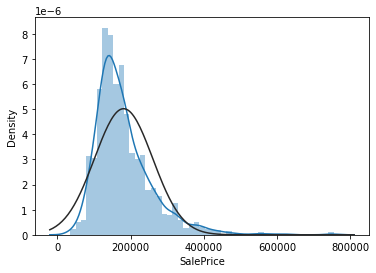

<Figure size 432x288 with 0 Axes>

In [7]:
# The chart below shows the slope and distribution of house prices.
print(f'skew: {db.SalePrice.skew()}')
sns.distplot(db.SalePrice, fit = norm)
f = plt.figure()
plt.show()

- **House prices are generally in the 200,000 dollars range, with outliers ranging from 34,900 dollars to 755,000 dollars.**

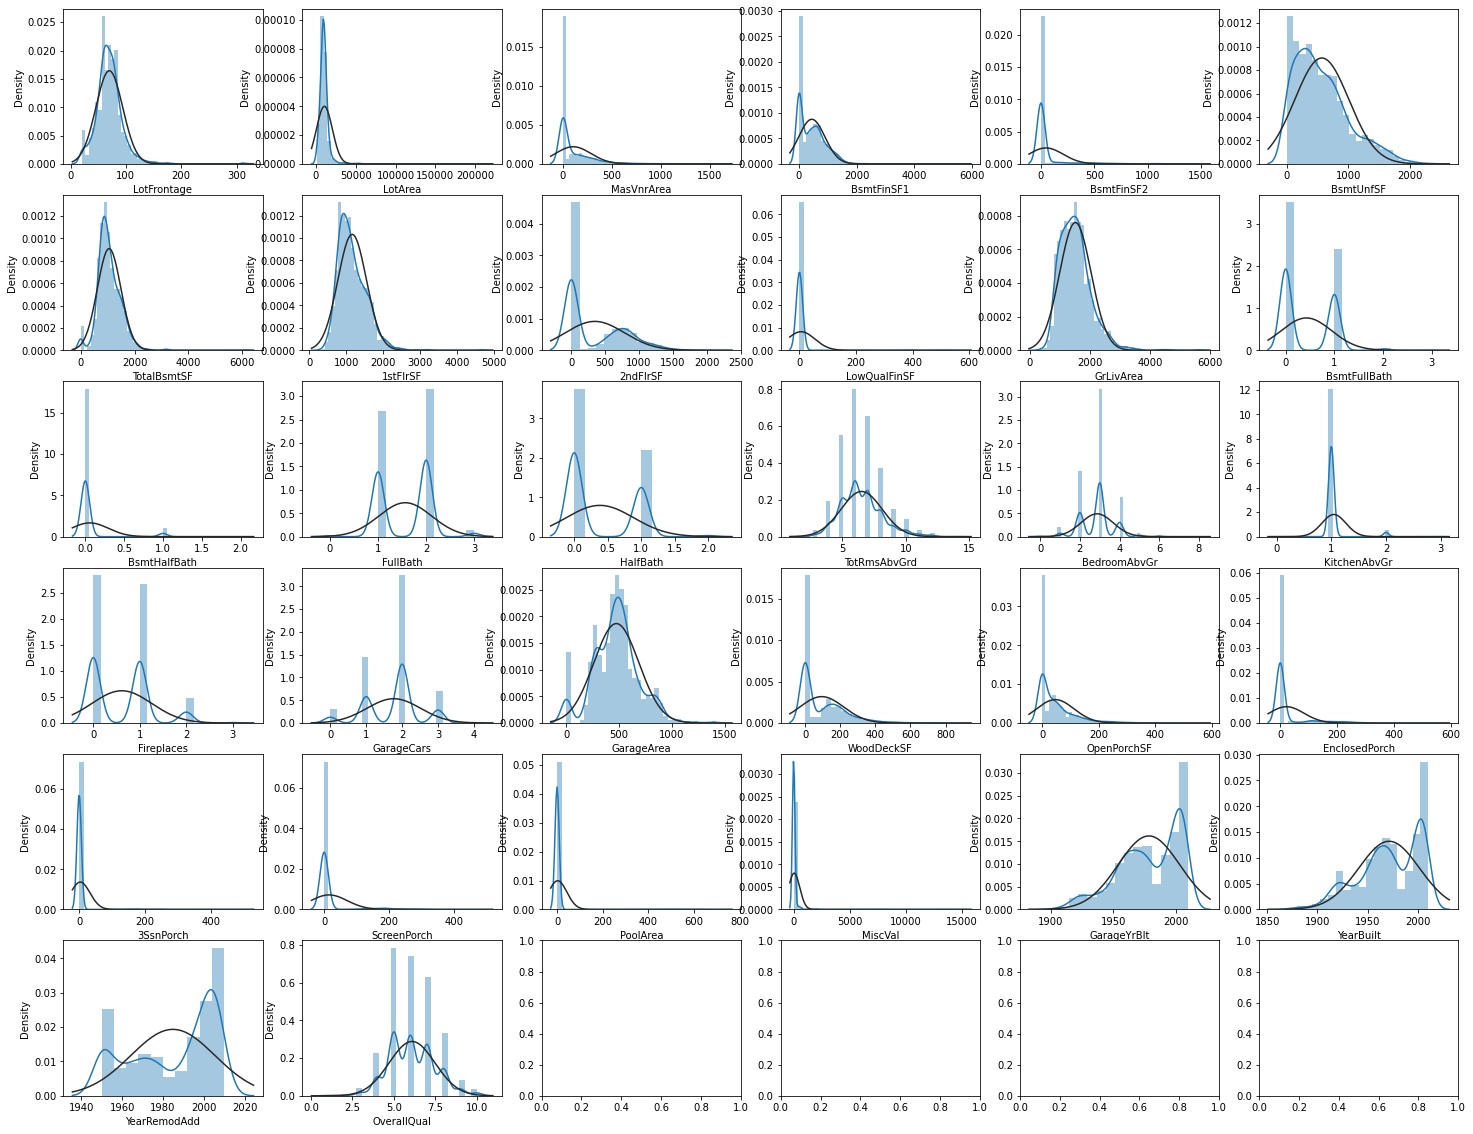

In [8]:
f, ax = plt.subplots(6, 6, figsize = (25, 20))
for i, c in enumerate(continue_vars):
    sns.distplot(db[c], fit = stats.norm, ax = ax[i//6, i%6])

- **The above charts are charts showing the distribution of each column of continue_vars. Each chart shows a variety of distributions from dense to irregularly distributed columns.**

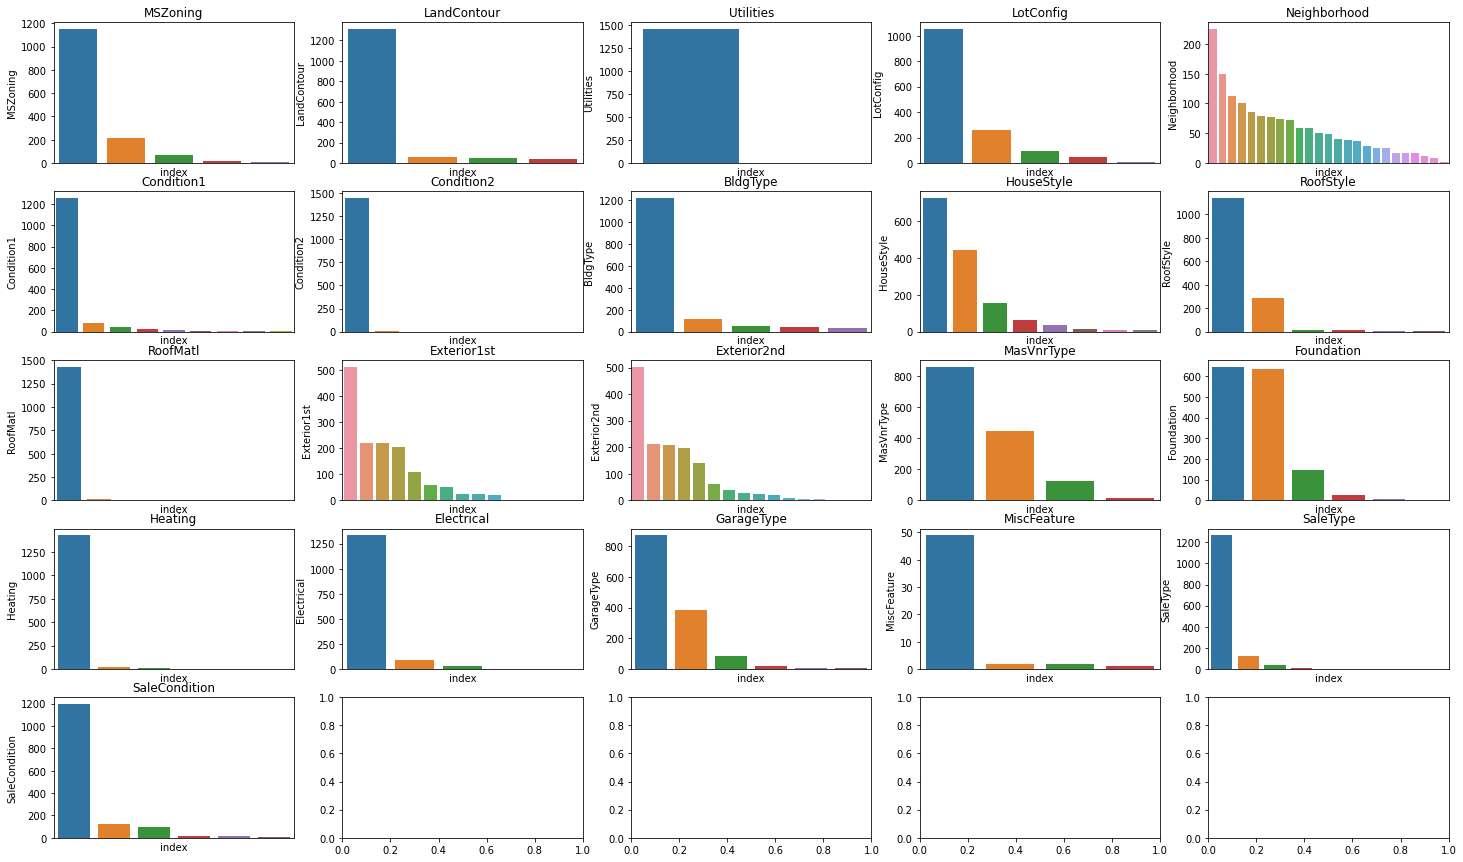

In [9]:
f, ax = plt.subplots(5, 5, figsize = (25, 15))
for i, c in enumerate(nominal_vars):
    g = sns.barplot(data = pd.DataFrame(db[c].value_counts()).reset_index(), x='index', y = c, ax = ax[i//5, i%5])
    g.set(xticks = [])
    g.set(title = c)

- **In the chart above, the charts of the columns belong to the normal_vars. In common, it shows a concentrated pattern in one value in each column.**

In [10]:
# Delete column "id" which is index. 
db.drop(['Id'], axis = 1, inplace = True)

- **The chart below is the distribution chart of the GrLivArea according to the house price. GrivArea had a high distribution of data at the bottom and a small number of outliers. Thus, the results of the machine learning model did not have a significant impact, but the outliers in the GrLiv Area column were deleted.**

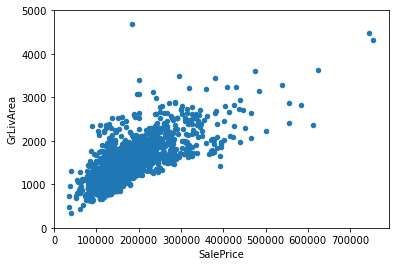

In [11]:
db[['SalePrice', 'GrLivArea']].plot.scatter(x = 'SalePrice', y = 'GrLivArea')
plt.ylim(0, 5000)
plt.show()

- **The chart with outliers removed is shown below. The 3,000 to 5,000 square feet values shown in the chart above have been removed.**

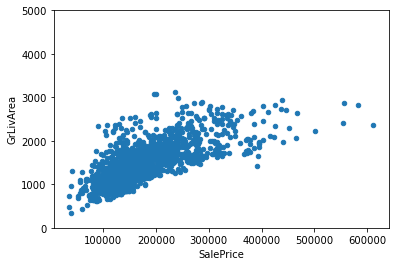

In [12]:
db.drop(db.GrLivArea.sort_values(ascending = False)[:15].index, axis = 0, inplace = True)
db[['SalePrice', 'GrLivArea']].plot.scatter(x = 'SalePrice', y = 'GrLivArea')
plt.ylim(0, 5000)
plt.show()

<h2> <font color=blue>4. Missing Values</font> 

- **There is a significant amount of missing values in this dataset. The method of deleting missing values is also one way, but in some columns, more than 90% of the data was found to be missing values, so the method of deleting them was not used.  The data types in each column are also different, so I filled in the missing values using a replacement method suitable for each column.**

In [13]:
db.isnull().sum() # Number of missing values for each column.

MSSubClass          0
MSZoning            0
LotFrontage       257
LotArea             0
Street              0
Alley            1355
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

- **As above, out of about 1,400 rows of data, more than 90% of the columns are missing values. The chart below shows the percentage of missing values in each column.**

In [14]:
count = db.isnull().sum()
percent = (count / db.isnull().count() * 100).sort_values(ascending = False)
missing_table = pd.DataFrame({'percent': percent})
missing_table.head(10)

,percent
PoolQC,99.653979
MiscFeature,96.262976
Alley,93.771626
Fence,80.761246
FireplaceQu,47.681661
LotFrontage,17.785467
GarageType,5.536332
GarageCond,5.536332
GarageFinish,5.536332
GarageQual,5.536332


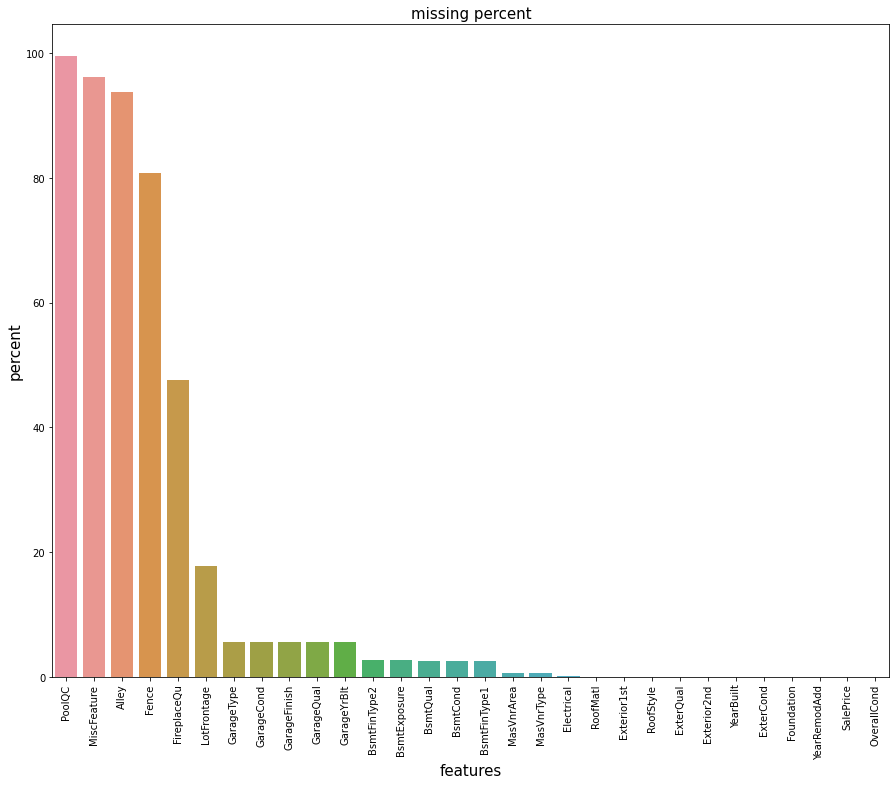

In [15]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x = percent.index[:30], y = percent[:30])
plt.title('missing percent', fontsize = 15)
plt.xlabel('features', fontsize = 15)
plt.ylabel('percent', fontsize = 15)
plt.show()

- **According to the chart, PoolQC, MiscFeature, Alley, Fence columns show an overwhelmingly high rate of missing.**

In [16]:
db["PoolQC"] = db["PoolQC"].fillna("None")
db["MiscFeature"] = db["MiscFeature"].fillna("None")
db["Alley"] = db["Alley"].fillna("None")
db["Fence"] = db["Fence"].fillna("None")
db["FireplaceQu"] = db["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    db[col] = db[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    db[col] = db[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    db[col] = db[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    db[col] = db[col].fillna('None')

db["MasVnrType"] = db["MasVnrType"].fillna("None")
db["MasVnrArea"] = db["MasVnrArea"].fillna(0)
db["Functional"] = db["Functional"].fillna("Typ")
db['MSSubClass'] = db['MSSubClass'].fillna("None")



# mean value replacements
db['MSZoning'] = db['MSZoning'].fillna(db['MSZoning'].mode()[0])
db['Electrical'] = db['Electrical'].fillna(db['Electrical'].mode()[0])
db['KitchenQual'] = db['KitchenQual'].fillna(db['KitchenQual'].mode()[0])
db['Exterior1st'] = db['Exterior1st'].fillna(db['Exterior1st'].mode()[0])
db['Exterior2nd'] = db['Exterior2nd'].fillna(db['Exterior2nd'].mode()[0])
db['SaleType'] = db['SaleType'].fillna(db['SaleType'].mode()[0])
db['LotFrontage'] = db['LotFrontage'].fillna(db['LotFrontage'].mode()[0])


- **For columns with string data, None is inserted for missing values, and 0 is inserted for columns with numeric data. In this case, mean value imputation was used for columns that significantly affect model training when replaced with 0 or None.**

In [17]:
# The number of missing values in the dataset after data insertion is completed.
db.isnull().sum().sum()

0

- **The string data is replaced with a numeric data using the get_dummies() method. In this case, the method used by get_dummies() is One-Hot Encording**

In [18]:
db = pd.get_dummies(db)
print(db.shape)

(1445, 302)


<h2> <font color=blue>5. Machine learning models</font> 

- **Models applied to supervised learning tested a total of three models: MLP Regressor, Ridge Regressor, and XGB Register. After testing normalized and unnormalized data, proceed with a model that can achieve better results.**

- **MLP Regression is short for multi-layer perceptron, which can be described as an upgraded version of logistic regression and artificial neural networks. MLP has the advantage of being able to better divide the division boundary in the form of adding a hidden layer between the input layer and output layer, which are logistic returns.**


- **Ridge Regression is a model that uses a normalization method to increase the predictive power of a linear model. Using the basic linear model is very suitable for frequently occurring overfitting, i.e., data, resulting in extremely fluctuating graphs, and the coefficient value of linear regression representing it is large. To prevent this situation, ridge regression is a random small adjustment of the coefficient by adding an equation. Therefore, it is a technique that can expect good results by minimizing errors and penalizing functions.**

- **XGB Regression is an ensemble method based on a decision tree, and among them, it is a machine learning technique based on the boosting method. It is also introduced as a good technique to prevent overfitting and has the advantage of supporting cross validation.**

In [19]:
# db is an existing data set, db_normalized is a normalized data set.
target = db['SalePrice']
db = db[db.columns.difference(['SalePrice'])]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(db)
db_normalized = scaler.transform(db)

In [20]:
# Divide the training set and test set through sklearn's train_test_split function.
x_train, x_test, y_train, y_test = train_test_split(db, target, test_size=0.2, shuffle=True,  random_state=34)
x_train_nor, x_test_nor, y_train_nor, y_test_nor = train_test_split(db_normalized, target, test_size=0.2, shuffle=True,  random_state=34)

<h3> MLP Regression    

- **After testing the normalized and unnormalized datasets, I find a model with better results through parameter testing.**

In [21]:
# Unnormalized dataset
regressorMLP = MLPRegressor()
regressorMLP.fit(x_train, y_train)
y_pred = regressorMLP.predict(x_test)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))

Training set score: 0.70
Test set score: 0.69


In [22]:
# normalized dataset
regressorMLP = MLPRegressor()
regressorMLP.fit(x_train_nor, y_train_nor)
y_pred = regressorMLP.predict(x_test_nor)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train_nor, y_train_nor))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test_nor, y_test_nor)))

Training set score: 0.60
Test set score: 0.58


- **The unnormalized data showed better results, so I proceeded to the unnormalized dataset. Then, I performed the activation parameter test.**

In [23]:
#Activation function for the hidden layer
print('# activation = identity')  
regressorMLP = MLPRegressor(activation = 'identity') #no-op activation, returns f(x) = x
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# activation = logistic')
regressorMLP = MLPRegressor(activation = 'logistic') #the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# activation = tanh')
regressorMLP = MLPRegressor(activation = 'tanh') #the hyperbolic tan function, returns f(x) = tanh(x)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# activation = relu')
regressorMLP = MLPRegressor(activation = 'relu') #the rectified linear unit function, returns f(x) = max(0, x)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')

# activation = identity
Training set score: 0.63
Test set score: 0.61


# activation = logistic
Training set score: -6.04
Test set score: -5.32


# activation = tanh
Training set score: -6.04
Test set score: -5.32


# activation = relu
Training set score: 0.69
Test set score: 0.68




- **Since relu showed the most accurate result, I set relu as the activation parameter and tested the solver.**

In [24]:
print('# solver= lbfgs') #  an optimizer in the family of quasi-Newton methods.
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs') 
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# solver= sgd') #stochastic gradient descent.
regressorMLP = MLPRegressor(activation = 'relu', solver = 'sgd')
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# solver= adam') #a stochastic gradient-based optimizer 
regressorMLP = MLPRegressor(activation = 'relu', solver = 'adam')
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')

# solver= lbfgs
Training set score: 0.80
Test set score: 0.80


# solver= sgd
Training set score: -398246593408596574901647103141702983447571735191826427008415233462745601503522037653757939618600938535933608094200761493170792418636905852391026298366525717345172331345372637120991304494125133509833218080599769937967316992.00
Test set score: -327462736949123958976558440279613001886379426634649138752485787456843596352662043551421281208662791396264175857492386187468911933934107022165495315279031724050639116253089294051008871303458292705857587233770469610366173184.00


# solver= adam
Training set score: 0.69
Test set score: 0.69




- **lbfgs showed the best value, so I fixed it as the solver and tested the alpha value (L2 regularization parameter).**

In [25]:
print('# alphas=0.01')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs', alpha = 0.01)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# alphas=0.1')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs', alpha = 0.1)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# alphas=1')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs',alpha = 1)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# alphas=10')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs',alpha = 10)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# alphas=100')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs',alpha = 100)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')
print('# alphas=1000')
regressorMLP = MLPRegressor(activation = 'relu', solver = 'lbfgs',alpha = 1000)
regressorMLP.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorMLP.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorMLP.score(x_test, y_test)))
print('\n')

# alphas=0.01
Training set score: 0.80
Test set score: 0.80


# alphas=0.1
Training set score: 0.80
Test set score: 0.81


# alphas=1
Training set score: 0.80
Test set score: 0.80


# alphas=10
Training set score: 0.79
Test set score: 0.79


# alphas=100
Training set score: 0.80
Test set score: 0.79


# alphas=1000
Training set score: 0.80
Test set score: 0.80




- **After completing parameter testing, MLP Regression model was trained with the parameters that gave the best results.**

In [26]:
# The model to which the parameters with the best results were applied
regressorMLP = MLPRegressor(activation = 'relu',solver = 'lbfgs', alpha = 100)
regressorMLP.fit(x_train, y_train)
y_pred = regressorMLP.predict(x_test)

In [27]:
# Mean, MAE, MSE, RMSE, R2 score of the model
print('Mean of SalePrice', np.mean(target))
# MAE: the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# MSE: the difference between the original and predicted values extracted by squared the average difference over the data set.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
# RMSE: the error rate by the square root of MSE.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R2: the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
print('R2:', metrics.r2_score(y_test, y_pred))

Mean of SalePrice 178395.9141868512
Mean Absolute Error: 25676.825170743752
Mean Squared Error: 1339127823.8277714
Root Mean Squared Error: 36594.095477655566
R2: 0.7877078683056064


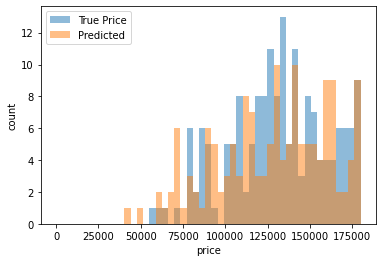

In [28]:
bins = np.linspace(0, 180000)
plt.hist(y_test, bins, alpha = 0.5, label = 'True Price')
plt.hist(y_pred, bins, alpha = 0.5, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

- **The graph above is a graph that visually shows the difference between the actual house price and the predicted house price. A relatively large part of it intersects, but several parts do not intersect.**

<h3> Ridge Regression

In [29]:
# Unnormalized dataset
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1, 10, 15, 20, 30, 40, 100]
regressorR = RidgeCV(alphas = alphas)
regressorR.fit(x_train, y_train)
y_pred = regressorR.predict(x_test)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))

Training set score: 0.93
Test set score: 0.91


In [30]:
# Normalized dataset
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1, 10, 15, 20, 30, 40, 100]
regressorRR = RidgeCV(alphas = alphas)
regressorRR.fit(x_train_nor, y_train_nor)
y_pred = regressorRR.predict(x_test_nor)
print("Training set score: {:.2f}".format(regressorRR.score(x_train_nor, y_train_nor))) 
print("Test set score: {:.2f}".format(regressorRR.score(x_test_nor, y_test_nor)))

Training set score: 0.94
Test set score: 0.90


- **The unnormalized data showed better results, so I proceeded to the unnormalized dataset.**

In [31]:
print('# alphas=0.0001')
regressorR = RidgeCV(alphas = [0.0001])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=0.001')
regressorR = RidgeCV(alphas = [0.001])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=0.01')
regressorR = RidgeCV(alphas = [0.01])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=0.1')
regressorR = RidgeCV(alphas = [0.1])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=1')
regressorR = RidgeCV(alphas = [1])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=10')
regressorR = RidgeCV(alphas = [10])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')
print('# alphas=100')
regressorR = RidgeCV(alphas = [100])
regressorR.fit(x_train, y_train)
print("Training set score: {:.2f}".format(regressorR.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(regressorR.score(x_test, y_test)))
print('\n')

# alphas=0.0001
Training set score: 0.88
Test set score: 0.57


# alphas=0.001
Training set score: 0.94
Test set score: 0.90


# alphas=0.01
Training set score: 0.94
Test set score: 0.90


# alphas=0.1
Training set score: 0.94
Test set score: 0.90


# alphas=1
Training set score: 0.94
Test set score: 0.91


# alphas=10
Training set score: 0.93
Test set score: 0.91


# alphas=100
Training set score: 0.92
Test set score: 0.90




- **The alpha value from 0.0001 to 0.001 shows a relatively low result, while the alpha value from 0.001 to 0.9 shows that the range of change in the result is not large and stable.**

- **The two charts below are charts for comparing weight vectors.**

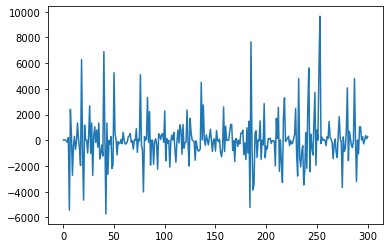

In [32]:
#Unnormalized dataset chart
plt.plot(regressorR.coef_)

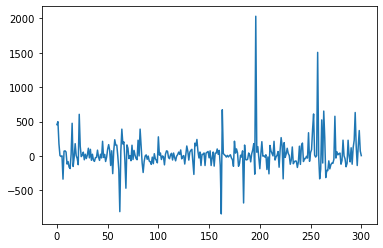

In [33]:
#Normalized dataset chart
plt.plot(regressorRR.coef_)

- **Like the charts above, it can be seen that the chart without normalization has large fluctuations, and the chart with normalization has small fluctuations.**

In [34]:
# The model to which the parameters with the best results were applied (unnormalized data and alpha value = 10)
regressorR = RidgeCV(alphas = [10])
regressorR.fit(x_train, y_train)
y_pred = regressorR.predict(x_test)
print('Mean of SalePrice', np.mean(target))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


Mean of SalePrice 178395.9141868512
Mean Absolute Error: 16342.555776968436
Mean Squared Error: 539413182.0742222
Root Mean Squared Error: 23225.270333716726
R2: 0.914486748576945


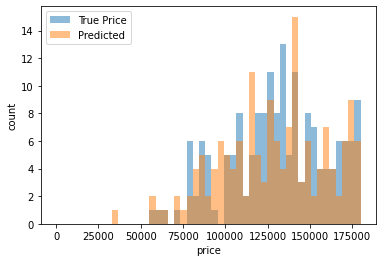

In [35]:
bins = np.linspace(0, 180000)
plt.hist(y_test, bins, alpha = 0.5, label = 'True Price')
plt.hist(y_pred, bins, alpha = 0.5, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

- **The Ridge Regressor graph has an additional cross section compared to the previous MLP regressor graph, and the R2 score shows a result value of 0.91. Mean Absolute Error(MAE) is also significantly reduced from about 25677 to 16343 compared to MLP, showing satisfactory results.**


<h3> XGB Regression
    

In [36]:
#max_depth: Maximum tree depth for base learners (default: 3)
#learning_rate: Decide how much weight to use for each training step (default: 0.1)
#n_estimaters: Number of gradient boosted trees
#reg_alpha: L1 regularization term on weights
#reg_lambda: L2 regularization term on weights 
#n_jobs: Number of parallel threads used to run xgboost. (default: -1 for use all cores of the computer)
#min_child_weight: Minimum sum of weights for all observations needed in child .

XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 1000,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
#Unnormalized dataset
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.92


In [37]:
#Normalized dataset
print("Training set score: {:.2f}".format(XGB.score(x_train_nor, y_train_nor))) 
print("Test set score: {:.2f}".format(XGB.score(x_test_nor, y_test_nor)))

Training set score: 0.19
Test set score: 0.19


- **In the case of XGB Regression, normalized data shows exceptionally low result values. Therefore, the test was conducted with a unnormalized data set.**

In [38]:
print('# n_estimators=10')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 10,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=50')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 50,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=100')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 100,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=300')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 300,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=600')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 600,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=900')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 900,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))
print('\n')
print('# n_estimators=1000')
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 1000,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
print("Training set score: {:.2f}".format(XGB.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(XGB.score(x_test, y_test)))

# n_estimators=10
Training set score: -0.02
Test set score: 0.05


# n_estimators=50
Training set score: 0.95
Test set score: 0.90


# n_estimators=100
Training set score: 0.97
Test set score: 0.91


# n_estimators=300
Training set score: 0.99
Test set score: 0.91


# n_estimators=600
Training set score: 1.00
Test set score: 0.92


# n_estimators=900
Training set score: 1.00
Test set score: 0.92


# n_estimators=1000
Training set score: 1.00
Test set score: 0.92


- **When n_estimator is 10, it goes down to an unpredictable level, and the score steadily rises to 100, and then stabilizes from 300. In the case of other parameters, only n_estimator was tested as they did not significantly affect the result value.** .

In [39]:
XGB = XGBRegressor(max_depth = 3,learning_rate = 0.1,n_estimators = 1000,reg_alpha = 0.001,reg_lambda = 0.000001,n_jobs = -1,min_child_weight = 3)
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)

In [40]:
print('Mean of SalePrice', np.mean(target))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean of SalePrice 178395.9141868512
Mean Absolute Error: 14712.978116890139
Mean Squared Error: 529691715.21889216
Root Mean Squared Error: 23015.032374926006
R2: 0.9160278941533361


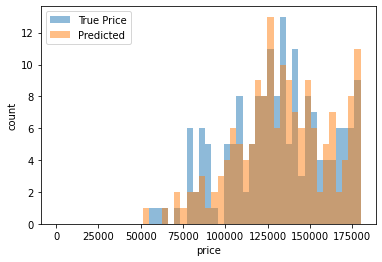

In [41]:
bins = np.linspace(0, 180000)
plt.hist(y_test, bins, alpha = 0.5, label = 'True Price')
plt.hist(y_pred, bins, alpha = 0.5, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

- **Although it is small in terms of R2 score, it shows better performance than the Ridge regression model. The difference is not large, so although the difference is not shown in the chart, you can check the Mean Absolute Error(MAE) value reduced from 16,000  to 14,000.**

<h2> <font color=blue>6. Result</font> 

-  **In the case of the MLP regression model, after normalization/unnormalization testing, parameter testing was performed to find a solver under activation, and then the alpha value was tested. It can be seen that the R2 score of the final model is 0.78 and Mean Absolute Error(MAE) is 25677, which is low considering the average house price is 178,395.**

- **In the case of the Ridge regression model, alpha parameter testing was performed, and weight comparison was performed through the chart. An R2 score of 0.91 and Mean Absolute Error(MAE) is 16343 showed improved results compared to the MLP model.**

- **In the XGB model, you can see that a lot of parameters are applied, but the difference in parameter values except for n_estimator does not have a big effect on the result, so only n_estimators were performed. R2 score of 0.91 showed the same results as Ridge, and Mean Absolute Error(MAE) showed better results than Ridge regression model.**

- **Among the three models, MLP regression model showed the lowest performance, and the XGB regression model showed the best score compared to Ridge regression model, although by a little. MLP regression model, Ridge regression model, and XGB regression model all showed better scores when data is not normalized. In particular, XGB regression model showed an abnormal increase from 0.19 to 0.92 when normalization was not performed.**